In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import pandas as pd
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['font.family'] = 'serif'
num_classes = 10
mode = 'accuracy'

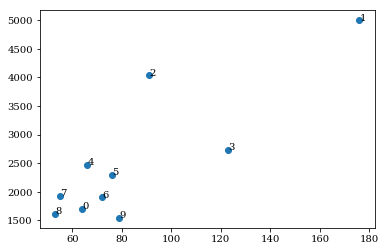

In [2]:
import csv

classes = []
params = np.zeros((num_classes, 3))

with open('svhn_output_df.csv', 'r') as f:
    reader = csv.DictReader(f)
    for i, line in enumerate(reader):
        classes.append(line['Predicted_Class_k'])
        params[i, 0] = int(line['R_k'])
        params[i, 1] = int(line['N_k']) - int(line['R_k'])
        params[i, 2] = float(line['Conf_k'])

params[:, 0:2] += 1
        
plt.scatter(params[:,1], params[:,0])
for i, _class in enumerate(classes):
    plt.annotate(_class, (params[i,1], params[i,0]))
    
df = pd.read_csv('svhn_output_df.csv')

In [3]:
# Sort by accuracy
accuracy = params[:,0] / (params[:,0] + params[:,1])
sort_idx = np.argsort(accuracy)

params = params[sort_idx,:]
classes = [classes[i] for i in sort_idx]

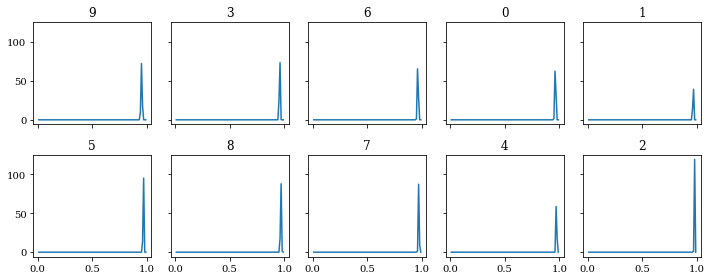

In [4]:
x = np.linspace(0.01, 0.99, 100)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(x, y)
    ax.set_title(predicted_class)

fig.tight_layout()

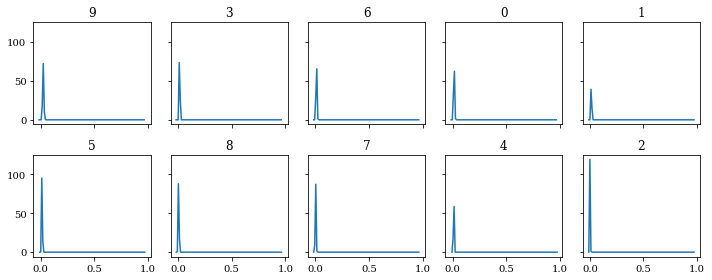

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), sharex=True, sharey=True)

for predicted_class, _params, ax in zip(classes, params, axs.flatten()):
    y = beta.pdf(x, _params[0], _params[1])
    ax.plot(_params[2] - x, y)
    ax.set_title(predicted_class)
    
fig.tight_layout()

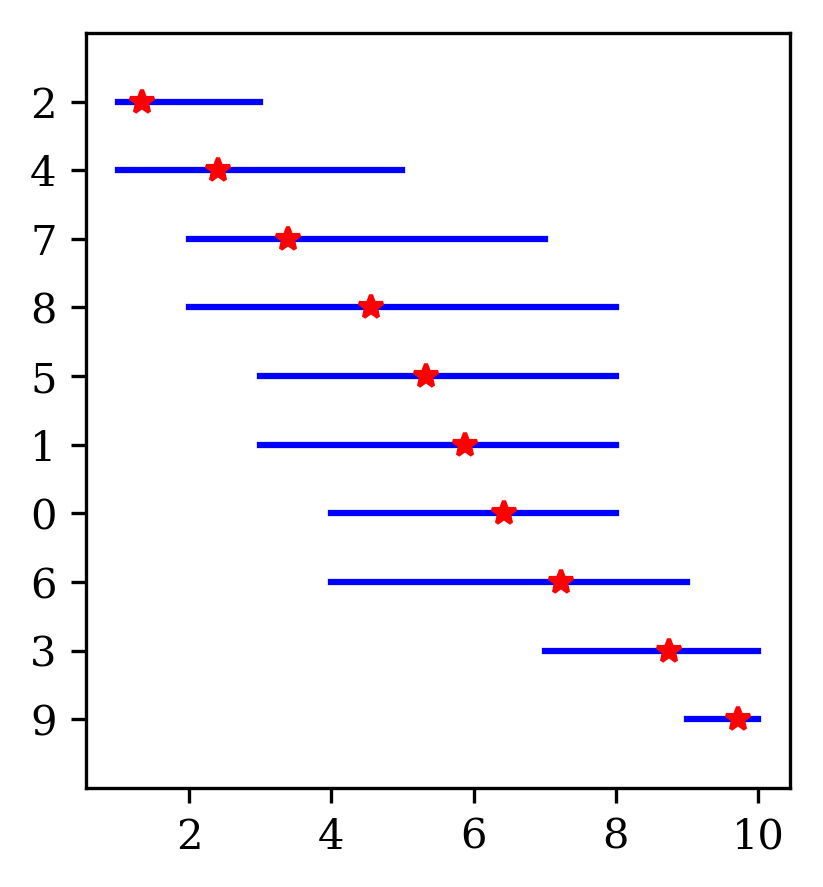

In [6]:
plt.figure(figsize=(3.03, 3.03*1.1), dpi=300)

n_samples = 10_000
monte_carlo_samples = np.zeros((num_classes, n_samples))

# Accuracy ranking
if mode == 'accuracy':
    for i in range(num_classes):
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples)

# Bias ranking
if mode == 'bias':
    for i in range(num_classes):
        monte_carlo_samples[i,:] = np.random.beta(params[i,0], params[i,1], n_samples) - params[i, 2]

    
ranks = num_classes - np.argsort(monte_carlo_samples, axis=0)
intervals = np.quantile(ranks, (0.05, 0.95), axis=1)
avg_ranks = np.mean(ranks, axis=1)

for i in range(num_classes):
    plt.plot([intervals[0, i], intervals[1, i]], [i, i], c='blue')
    plt.plot(avg_ranks[i], i, marker='*', c='red')


plt.ylim(-1, num_classes)

plt.yticks(ticks = list(range(num_classes)), labels = classes);

In [7]:
params[:,0]/(params[:,0] + params[:,1]) - params[:,2]

array([-0.02345779, -0.01553721, -0.01102185, -0.01405805, -0.01502831,
       -0.01279615, -0.0060765 , -0.00307997, -0.01082664, -0.00273735])